<a href="https://colab.research.google.com/github/davidho27941/ML_tutorial_notebook/blob/main/ETL_tensorflow_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 利用TensorFlow-Datasets函式庫進行ETL流程

## 載入必要函式庫

為了要實作基於Tensorflow-Datasets的資料導入流程，我們需要導入以下函式庫：

* Tensorflow
* Tensorflow-datasets

以及常用的資料處理函式庫：

* Numpy 
* Pandas


In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import tensorflow_datasets as tfds 

## 利用TensorFlow-Datasets函式庫導入MNIST資料集
---
### MNSIT 簡介
MNIST是機器學習入門中，最基本也最常見的資料集。在MNIST資料集當中，具有：


1.   60,000張訓練影像
2.   10,000張測試影像

在資料集中，具有10個類別，分別對應到0~9的手寫數字。

> 你可以在[Tensorflow 官方文件取得更多資訊](https://www.tensorflow.org/datasets/catalog/mnist)。
---
### TensorFlow-Datasets 簡介
**TensorFlow-Datasets**是一由TensorFlow所提供的函式庫，可以整合資料的抽取(Extract)、轉置（Transform）、以及載入（Load）過程[^1]為一體的函式庫。

![](https://hackmd.io/_uploads/S10XJ6z49.png)

用戶可以通過Tensorflow-dataset所提供的資料集，或是利用自己準備的資料集，通過Tensorflow-dataset提供的API將資料輕易的導入訓練流程之中。


> 以下將`tensorflow-datasets`簡稱為`tfds`。

1.   資料抽取
用戶可以利用`tfds.load`函式來進行資料的導入。使用時至少需要傳遞以下參數：


*   `name`: 資料集的名稱，同時可包含資料集版本。範例：`name=mnist:3.0.0`
*   `split`: 所要讀取的部份，如果有分類，也可以直接呼叫分類，例如：`train`。同時可以利用分類加上數值或是比例（i.e. `train[:50000]`或`train[:80%]`）來進行切片。
* `as_supervised`：須為布林值。如果為真，則回傳監督式學習所需要的資料以及標籤；若為否，則回傳一個包含所有特徵的字典物件。

如果並非使用預先提供的資料集，則需要另外宣告`data_dir`來指名資料及的所在位置。另外，若同時希望載入資料相關資料，可以宣告`with_info=True`來取得資訊（若有提供）。

> 更多資訊可以參考[官方文件](https://www.tensorflow.org/datasets/api_docs/python/tfds/load)。

2.   資料轉置

當用戶透過`tfds.load()`函式將資料抽出之後，可以利用所建立的`tf.data.Dataset`物件進行資料的轉置以及載入。以下是幾個基礎的用法：

* 隨機排序： `dataset.shuffle(BUFFER_SIZE)`。
* 重複資料： `dataset.repeat(NUM_EPOCHS)`
* 對資料進行映射： `dataset.map(lambda x: ...)`
* 賦予資料批次： `dataset.batch(BATCH_SIZE)`

3. 資料載入：

當用戶完成自訂的抽出以及轉置流程後，可以利用前述建立的物件進行資料載入。其方法很簡單，可以直接將物件傳遞至`model.fit()`函式中進行訓練，或是利用`.take()`方法查看個別資料的狀況。

以下是一些簡單的範例。


[^1] 簡稱ETL。

# 範例 - 利用`tfds.load()`函式抽出資料

In [ ]:
#@title 建立tf.data.Dataset物件
#@markdown Tensorflow-dataset允許用戶通過`split`參數宣告要取用的部份。

#@markdown 勾選將`AS_SUPERVISED`設定為`True`
AS_SUPERVISED = True #@param {type: 'boolean'}
#@markdown 勾選將`WITH_INFO`設定為`True`
WITH_INFO = True #@param {type: 'boolean'}

if WITH_INFO:
    whole_dataset, whole_dataset_info = tfds.load(name="mnist", 
                            split='train+test', 
                            with_info=WITH_INFO, 
                            as_supervised=AS_SUPERVISED) 
else: 
    whole_dataset = tfds.load(name="mnist", 
                            split='train+test', 
                            with_info=WITH_INFO, 
                            as_supervised=AS_SUPERVISED) 
    
print(f"WITH_INFO is now: {WITH_INFO}")
if WITH_INFO:
    print(f'Content of whole_dataset: {whole_dataset}.\n')
    print(f"Type of whole_dataset: {type(whole_dataset)}.\n")
    print(f"Content of :{whole_dataset_info}.\n")
else:
    print(f'Content of whole_dataset: {whole_dataset}.\n')
    print(f'Type of whole_dataset: {type(whole_dataset)}.')

print(f"AS_SUPERVISED is now: {AS_SUPERVISED}")
if AS_SUPERVISED:
    for image, label in whole_dataset.take(1):
        print(f"Type of the item return by tfds.load() function: {type((image, label))}")
        print(f'Image: {image}, size: {image.shape}')
        print(f'Label: {label}')
else:
    for item in whole_dataset.take(1):
        print(f"Type of the item return by tfds.load() function: {type(item)}")
        print(f"Image in item: {item['image']}")
        print(f"Label in item: { item['label'] }")

WITH_INFO is now: False
Content of whole_dataset: <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>.

Type of whole_dataset: <class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>.
AS_SUPERVISED is now: True
Type of the item return by tfds.load() function: <class 'tuple'>
Image: [[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
 

在上方的範例中，我們可以發現`as_supervised`參數的設置會影響到其回傳的資料類型；同時搭配`with_info=True`可以讓我們取得資料集的資訊。

# 範例 - 利用`tf.data.Datset`類別的自帶方法（method）轉置資料


In [ ]:
# 抽取訓練資料集
train_ds, train_ds_info = tfds.load(name="mnist", 
                    split='train', 
                    with_info=True, 
                    as_supervised=True)
print(f"Length of train_ds: {len(list(train_ds.as_numpy_iterator()))}")

Length of train_ds: 60000


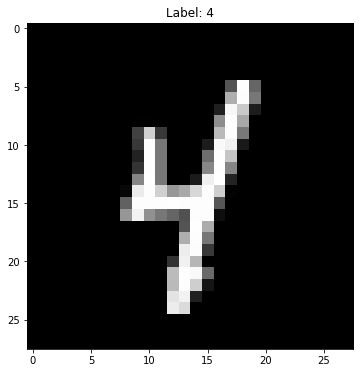

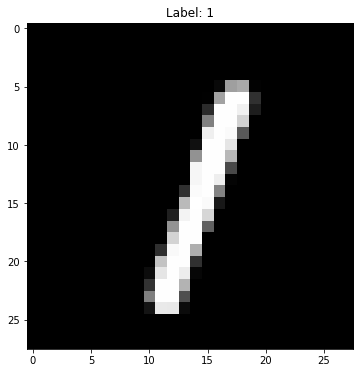

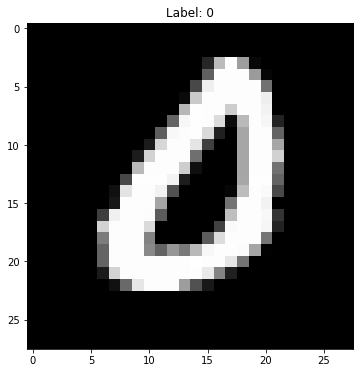

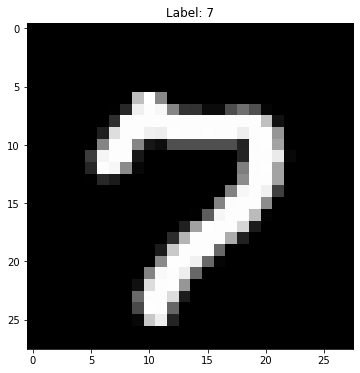

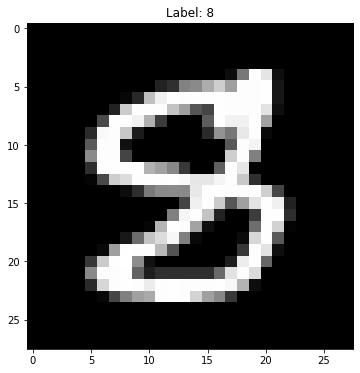

In [ ]:
# 查看`train_ds`的內容
# 利用matplotlib直接查看影像內容
import matplotlib.pyplot as plt 

for image, label in train_ds.take(5):
    # transform `image` to numpy array and remove the last chennel. 
    # i.e. transform from (28, 28, 1) to (28, 28).
    image = np.array(image).squeeze()
    plt.figure(figsize=(6, 6))
    plt.title(f"Label: {label}")
    plt.imshow(image, cmap='gray')

In [ ]:
# 取得重新排序前的前五筆標籤
pre_label = [label for _, label in train_ds.take(5)]

# 將訓練資料集重新排序
train_ds = train_ds.shuffle(100)

# 重新取得前五個元素
after_label = [label for _, label in train_ds.take(5)]

for pre, after in zip(pre_label, after_label):
    print(f"Previous: {pre}, after: {after}")

Previous: 4, after: 5
Previous: 1, after: 7
Previous: 0, after: 0
Previous: 7, after: 7
Previous: 8, after: 4


In [ ]:
# 利用匿名函式將資料進行正規化
def rescale(x, y):
    x = x/255
    return x, y

train_ds = train_ds.map(lambda x, y: rescale(x, y))

count = 0
for image, _ in train_ds.take(5):
    print(f"The maximum value of image is: {np.amax(image)}")
    count += 1

The maximum value of image is: 1.0
The maximum value of image is: 0.9960784316062927
The maximum value of image is: 0.9960784316062927
The maximum value of image is: 1.0
The maximum value of image is: 1.0


In [ ]:
# 將訓練資料進行批次化
train_ds = train_ds.batch(64)
for image, label in train_ds.take(1):
    print(image.shape)

(64, 28, 28, 1)
